Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/bnd_buffer/1/'

NP = 5_000
NC = 5_000
IPP = 1_000
BB = 6_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}5/prod_cons_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}5/prod_cons_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}5/prod_cons_bounded_buffer_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}5/prod_cons_bounded_buffer_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)


Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 16:02:32 2025 +0200) (510.24ms ela...,2.0700,0.00203,0.446,2.58,0.53,35.90,63.46 C,Nominal
1,(Sat Apr 12 16:02:33 2025 +0200) (506.56ms ela...,6.2400,0.03360,0.675,6.99,1.22,99.98,63.07 C,Nominal
2,(Sat Apr 12 16:02:33 2025 +0200) (506.63ms ela...,2.1100,0.00000,0.398,2.34,0.30,21.45,63.07 C,Nominal
3,(Sat Apr 12 16:02:34 2025 +0200) (508.27ms ela...,0.0928,0.00000,0.272,0.16,0.06,3.90,62.67 C,Nominal
4,(Sat Apr 12 16:02:34 2025 +0200) (508.03ms ela...,0.0782,0.00000,0.264,0.13,0.03,2.49,62.67 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(759, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 16:02:43 2025 +0200) (109.03ms ela...,38.2,0.0,1.79,39.42,3.99,99.72,60.45 C,Nominal
1,(Sat Apr 12 16:02:43 2025 +0200) (105.74ms ela...,37.8,0.0,1.14,38.91,3.98,99.69,60.45 C,Nominal
2,(Sat Apr 12 16:02:43 2025 +0200) (104.73ms ela...,39.2,0.0,1.96,40.58,3.97,99.57,60.45 C,Nominal
3,(Sat Apr 12 16:02:43 2025 +0200) (105.34ms ela...,40.9,0.0,2.07,42.03,3.97,99.45,60.45 C,Nominal
4,(Sat Apr 12 16:02:44 2025 +0200) (105.93ms ela...,41.8,0.0,1.66,43.05,3.99,99.81,60.45 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 16:05:29 2025 +0200) (509.93ms ela...,1.8100,0.000,0.468,2.13,0.36,31.71,60.57 C,Nominal
1,(Sat Apr 12 16:05:29 2025 +0200) (508.10ms ela...,0.1060,0.036,0.388,0.22,0.05,3.41,60.57 C,Nominal
2,(Sat Apr 12 16:05:30 2025 +0200) (508.40ms ela...,1.1600,0.000,0.286,1.28,0.19,16.30,60.46 C,Nominal
3,(Sat Apr 12 16:05:30 2025 +0200) (508.27ms ela...,0.0747,0.000,0.250,0.13,0.05,3.38,60.46 C,Nominal
4,(Sat Apr 12 16:05:31 2025 +0200) (509.42ms ela...,0.2030,0.000,0.294,0.29,0.11,5.72,60.32 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(1482, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 16:05:40 2025 +0200) (108.41ms ela...,29.1,0.0,0.761,29.99,3.90,98.24,58.35 C,Nominal
1,(Sat Apr 12 16:05:40 2025 +0200) (104.79ms ela...,29.1,0.0,0.743,29.93,3.93,98.84,58.35 C,Nominal
2,(Sat Apr 12 16:05:40 2025 +0200) (104.63ms ela...,29.5,0.0,0.754,30.07,3.95,99.17,58.35 C,Nominal
3,(Sat Apr 12 16:05:40 2025 +0200) (105.01ms ela...,29.1,0.0,0.757,29.88,3.93,98.77,58.35 C,Nominal
4,(Sat Apr 12 16:05:40 2025 +0200) (104.58ms ela...,29.1,0.0,0.756,29.93,3.94,99.04,58.35 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

print(scala_idle_data.dtypes)
print(scala_bench_data.dtypes)
print(erlang_idle_data.dtypes)
print(erlang_bench_data.dtypes)

Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA) Power(W)           float64
Avg Num Cores Active            float64
Cores Active(%)                 float64
CPU Temp(C)                     float64
Pressure Level                   object
Time Elapsed (ms)               float64
dtype: object
Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA) Power(W)           float64
Avg Num Cores Active            float64
Cores Active(%)                 float64
CPU Temp(C)                     float64
Pressure Level                   object
Time Elapsed (ms)               float64
dtype: object
Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 16:02:32,2.0700,0.00203,0.446,2.58,0.53,35.90,63.46,Nominal,510.24
1,2025-04-12 16:02:33,6.2400,0.03360,0.675,6.99,1.22,99.98,63.07,Nominal,506.56
2,2025-04-12 16:02:33,2.1100,0.00000,0.398,2.34,0.30,21.45,63.07,Nominal,506.63
3,2025-04-12 16:02:34,0.0928,0.00000,0.272,0.16,0.06,3.90,62.67,Nominal,508.27
4,2025-04-12 16:02:34,0.0782,0.00000,0.264,0.13,0.03,2.49,62.67,Nominal,508.03


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(759, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 16:02:43,38.2,0.0,1.79,39.42,3.99,99.72,60.45,Nominal,109.03
1,2025-04-12 16:02:43,37.8,0.0,1.14,38.91,3.98,99.69,60.45,Nominal,105.74
2,2025-04-12 16:02:43,39.2,0.0,1.96,40.58,3.97,99.57,60.45,Nominal,104.73
3,2025-04-12 16:02:43,40.9,0.0,2.07,42.03,3.97,99.45,60.45,Nominal,105.34
4,2025-04-12 16:02:44,41.8,0.0,1.66,43.05,3.99,99.81,60.45,Nominal,105.93


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 16:05:29,1.8100,0.000,0.468,2.13,0.36,31.71,60.57,Nominal,509.93
1,2025-04-12 16:05:29,0.1060,0.036,0.388,0.22,0.05,3.41,60.57,Nominal,508.10
2,2025-04-12 16:05:30,1.1600,0.000,0.286,1.28,0.19,16.30,60.46,Nominal,508.40
3,2025-04-12 16:05:30,0.0747,0.000,0.250,0.13,0.05,3.38,60.46,Nominal,508.27
4,2025-04-12 16:05:31,0.2030,0.000,0.294,0.29,0.11,5.72,60.32,Nominal,509.42


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(1482, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 16:05:40,29.1,0.0,0.761,29.99,3.90,98.24,58.35,Nominal,108.41
1,2025-04-12 16:05:40,29.1,0.0,0.743,29.93,3.93,98.84,58.35,Nominal,104.79
2,2025-04-12 16:05:40,29.5,0.0,0.754,30.07,3.95,99.17,58.35,Nominal,104.63
3,2025-04-12 16:05:40,29.1,0.0,0.757,29.88,3.93,98.77,58.35,Nominal,105.01
4,2025-04-12 16:05:40,29.1,0.0,0.756,29.93,3.94,99.04,58.35,Nominal,104.58


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


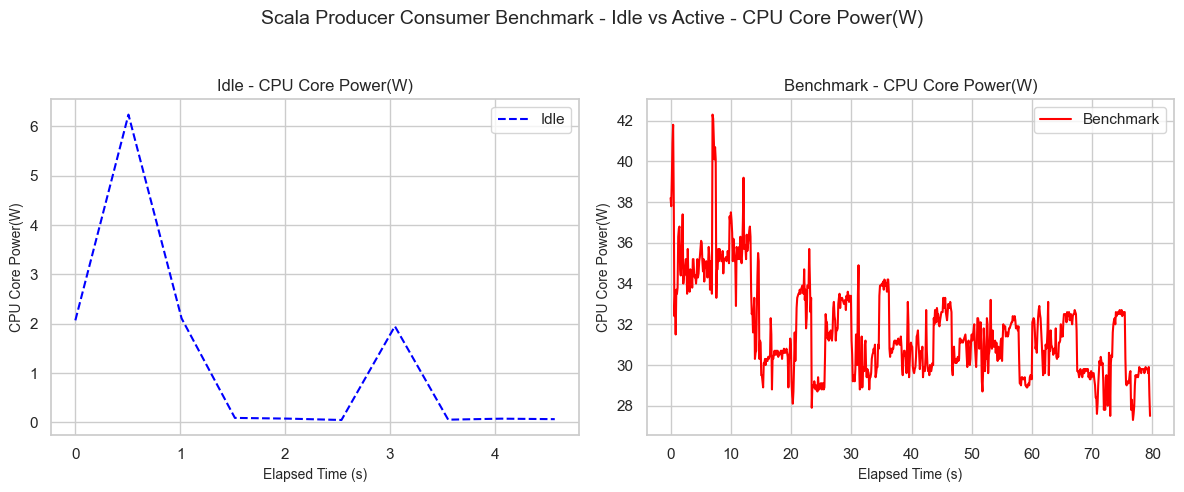

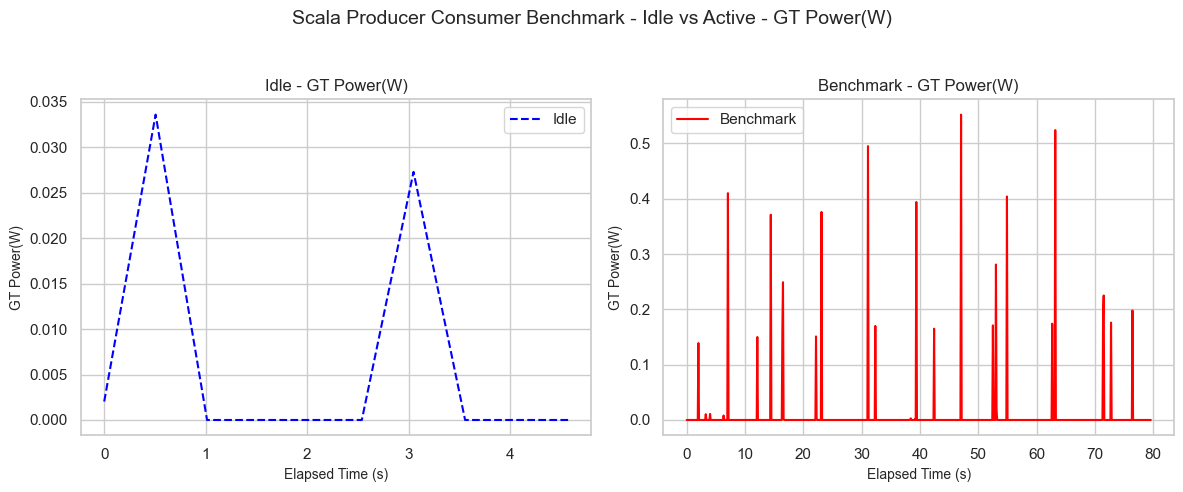

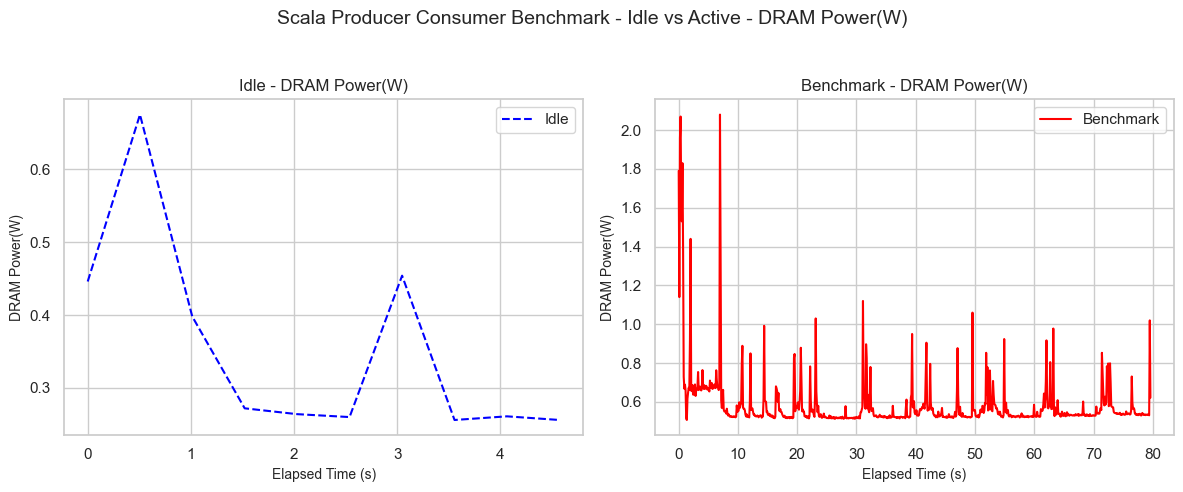

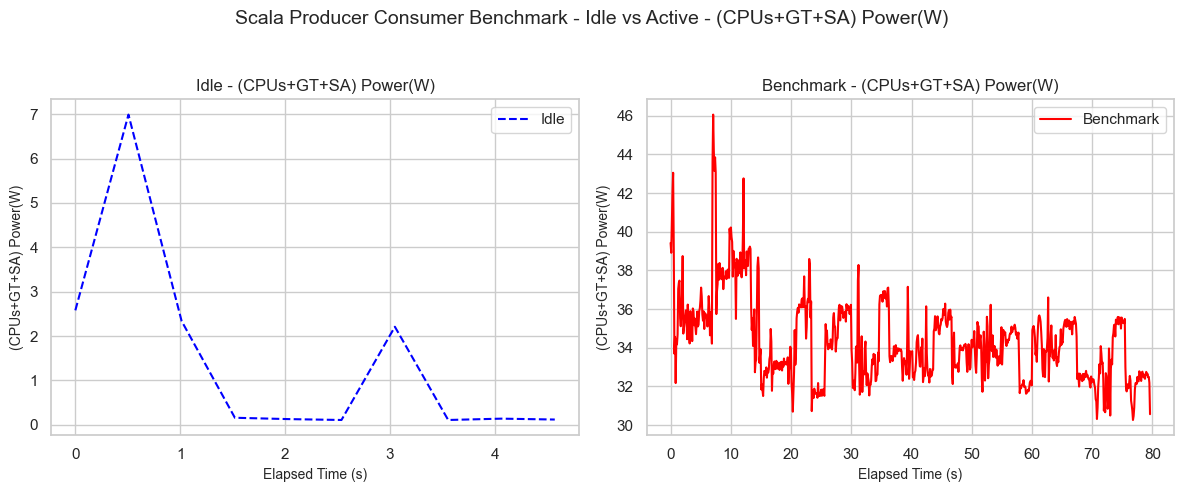

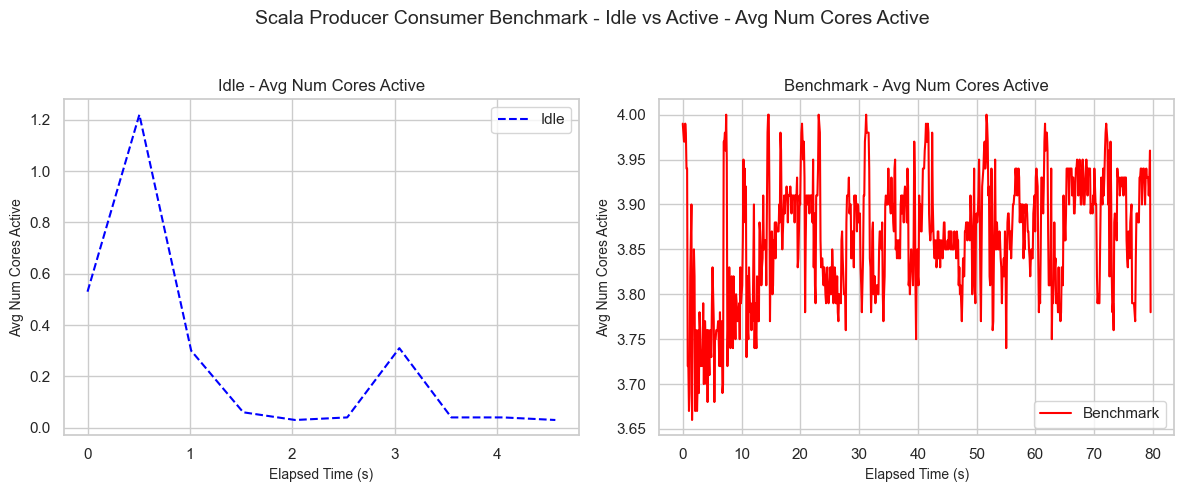

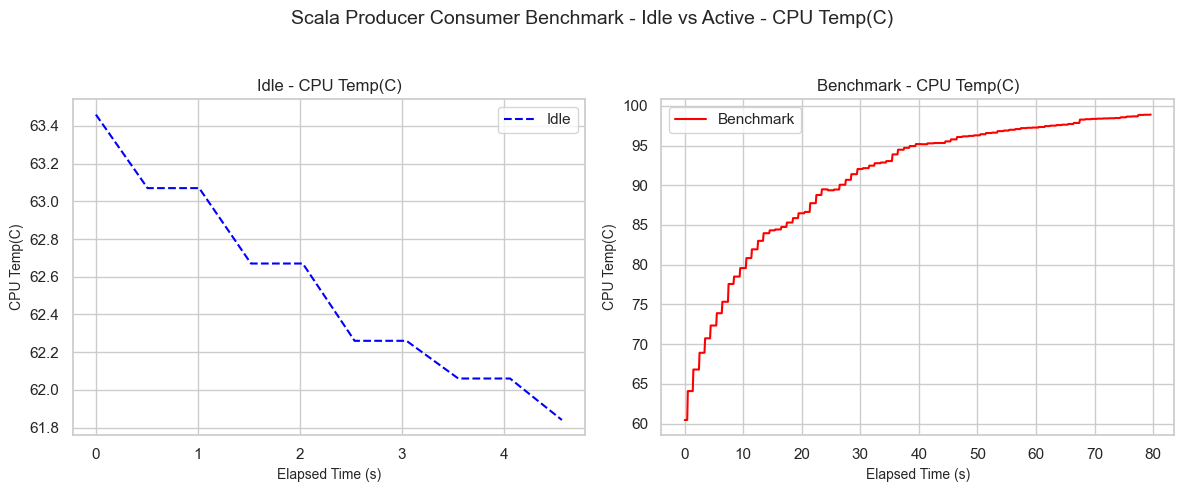

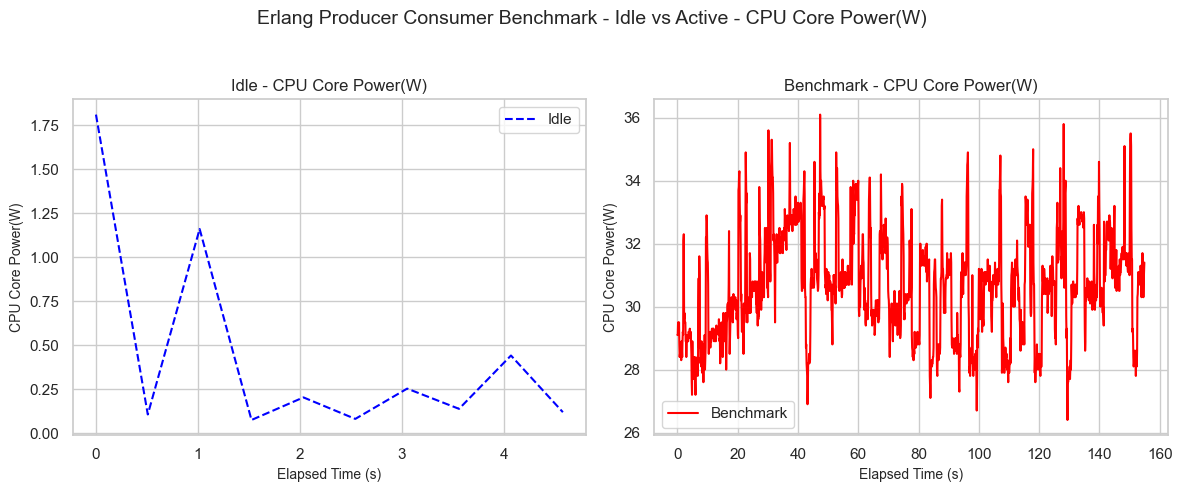

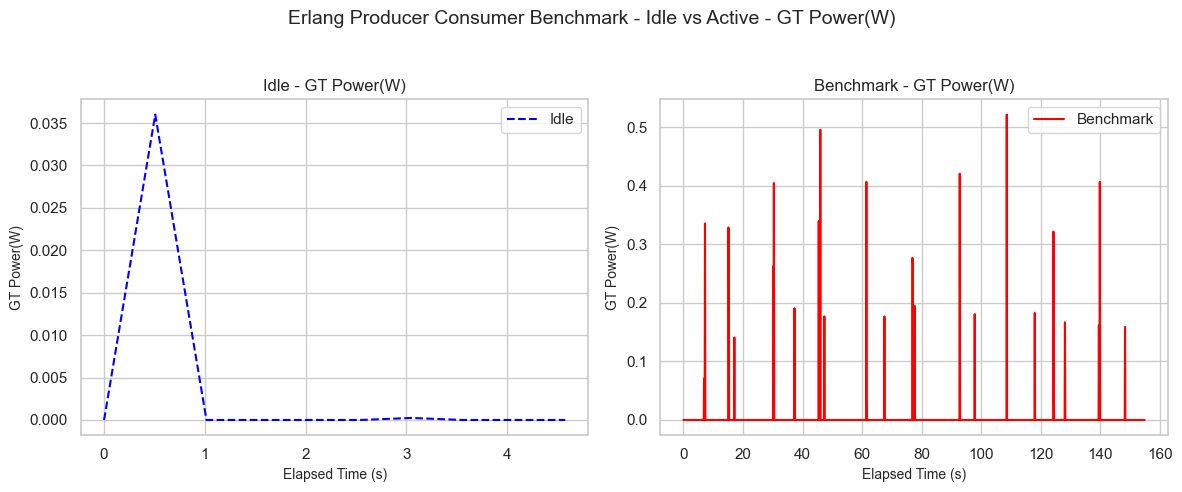

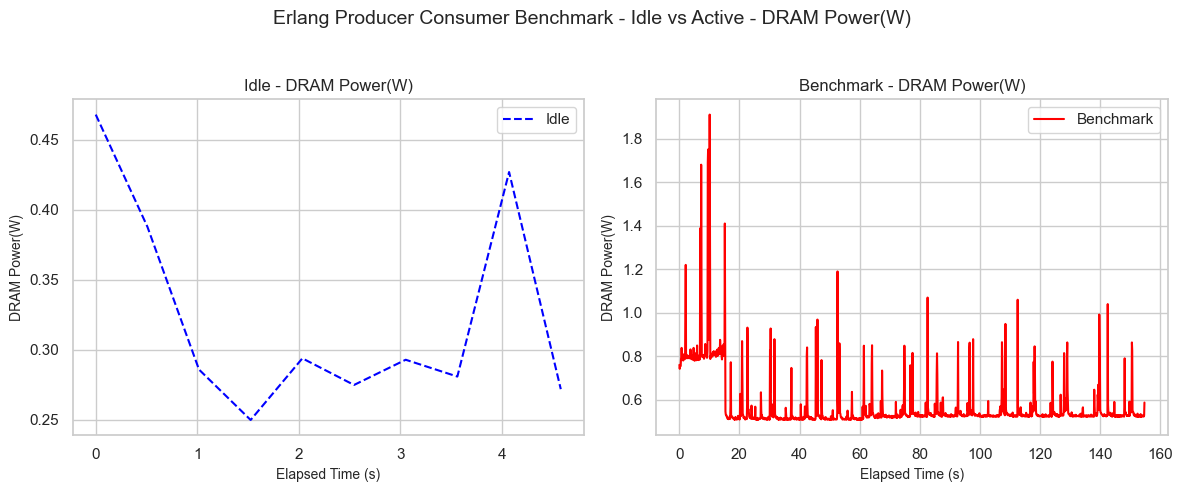

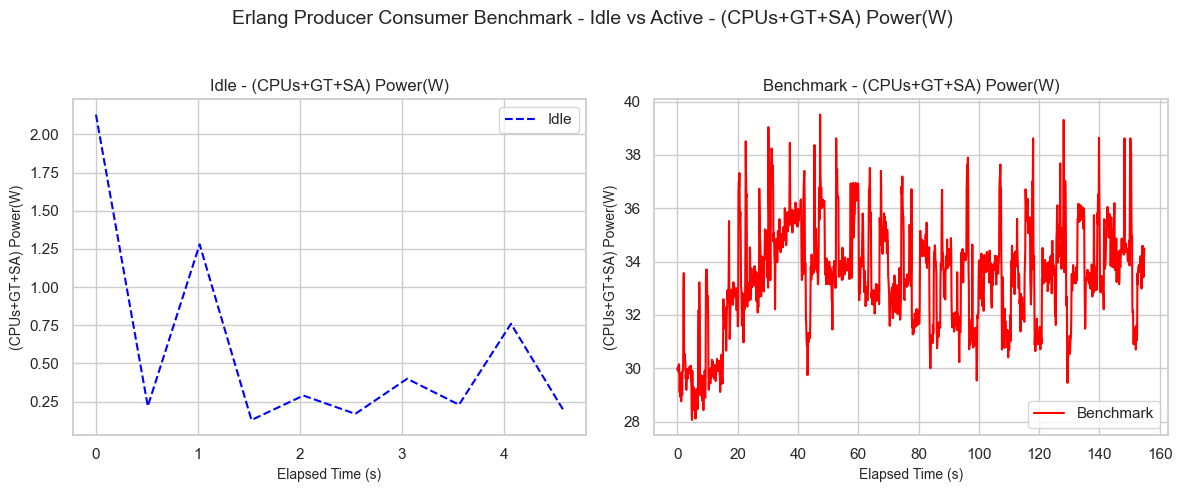

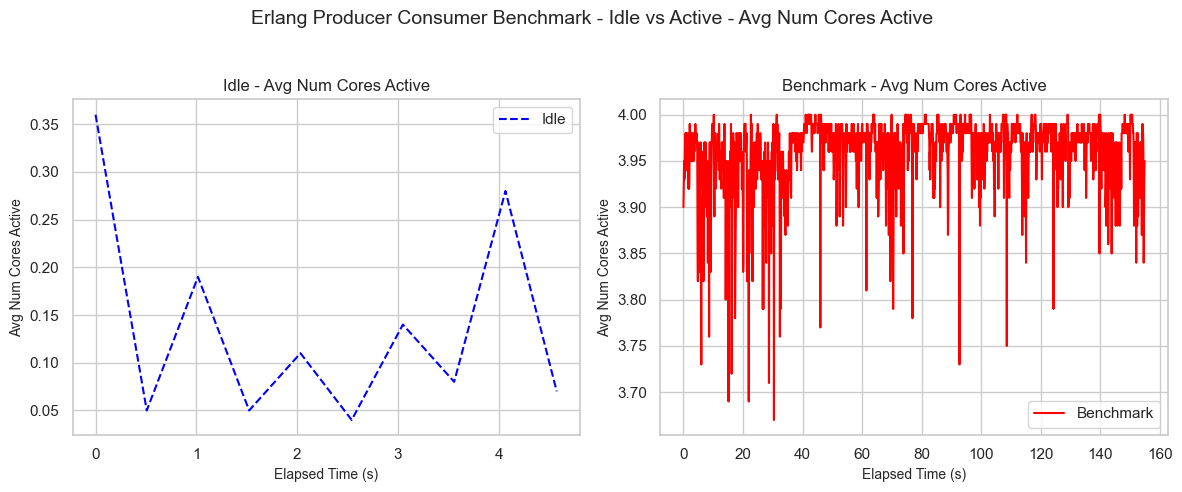

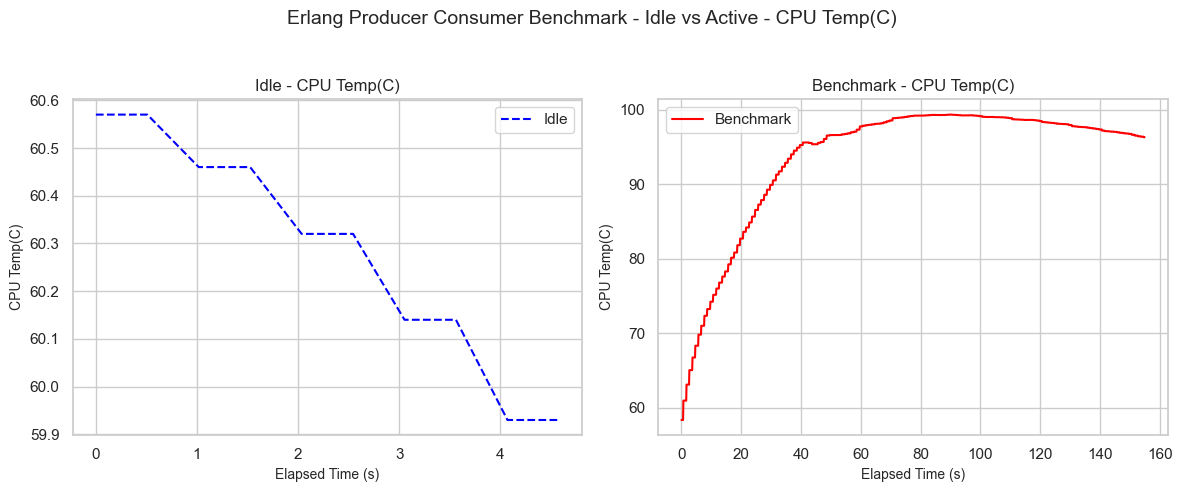

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Producer Consumer Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Producer Consumer Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()

In [17]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

producers = format_number_str(NP)
consumers = format_number_str(NC)
item_per_producer = format_number_str(IPP)
buffer_size = format_number_str(BB)
title_config_prefix = f"({producers} Producers, {consumers} Consumers,{item_per_producer} Items, {buffer_size} Buffer Size, {ITERATIONS} Iterations)"

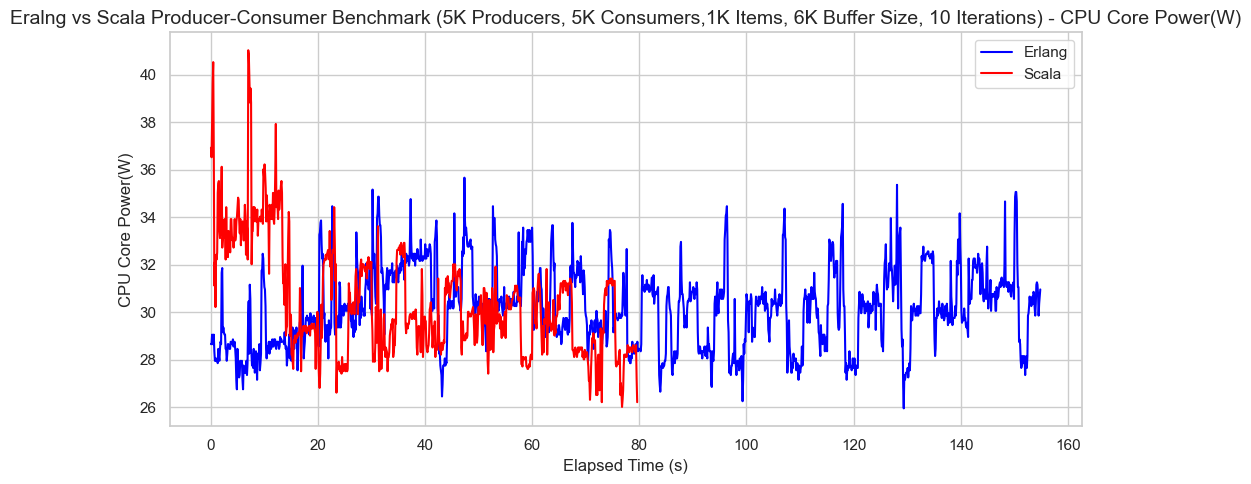

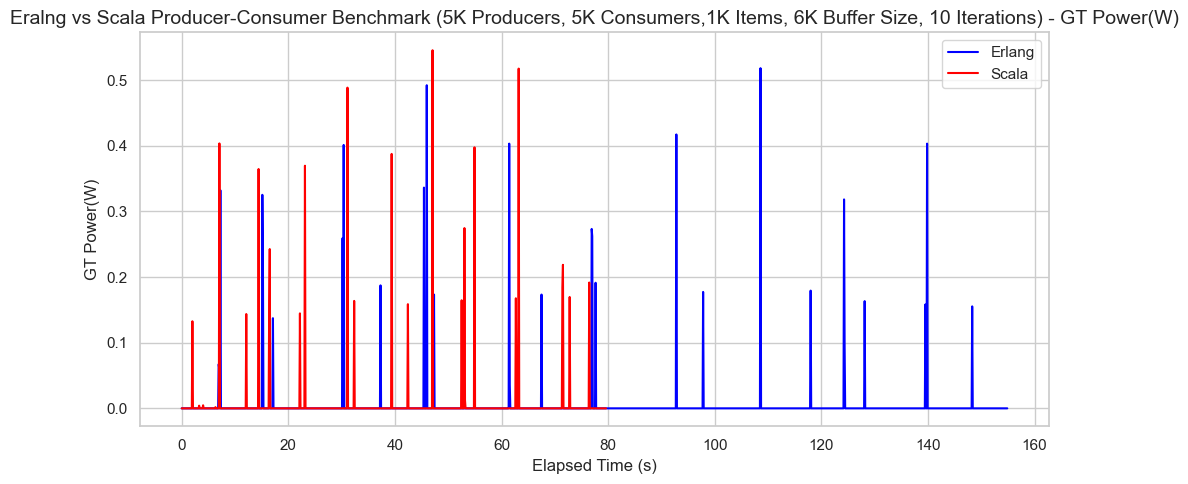

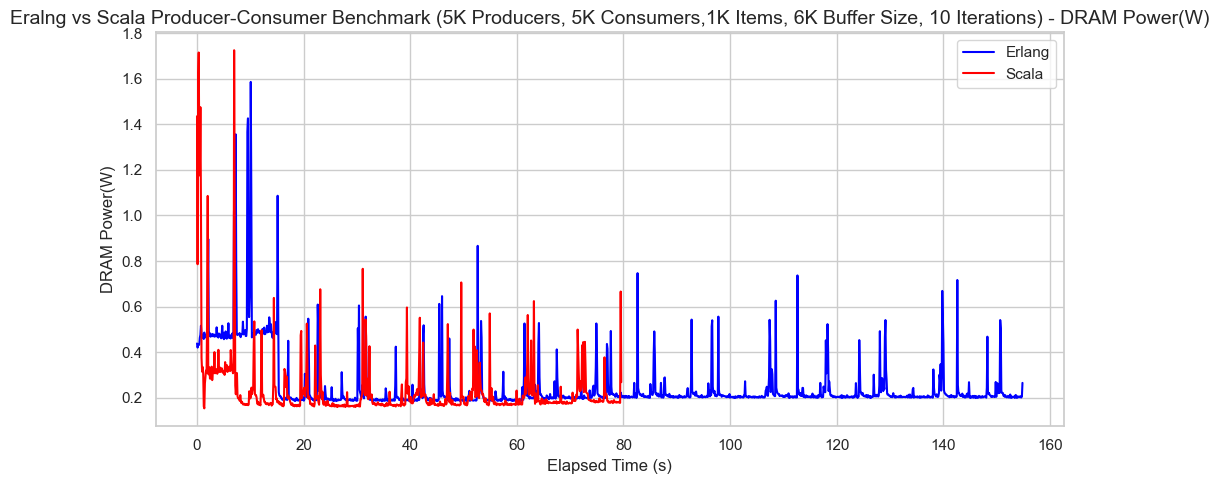

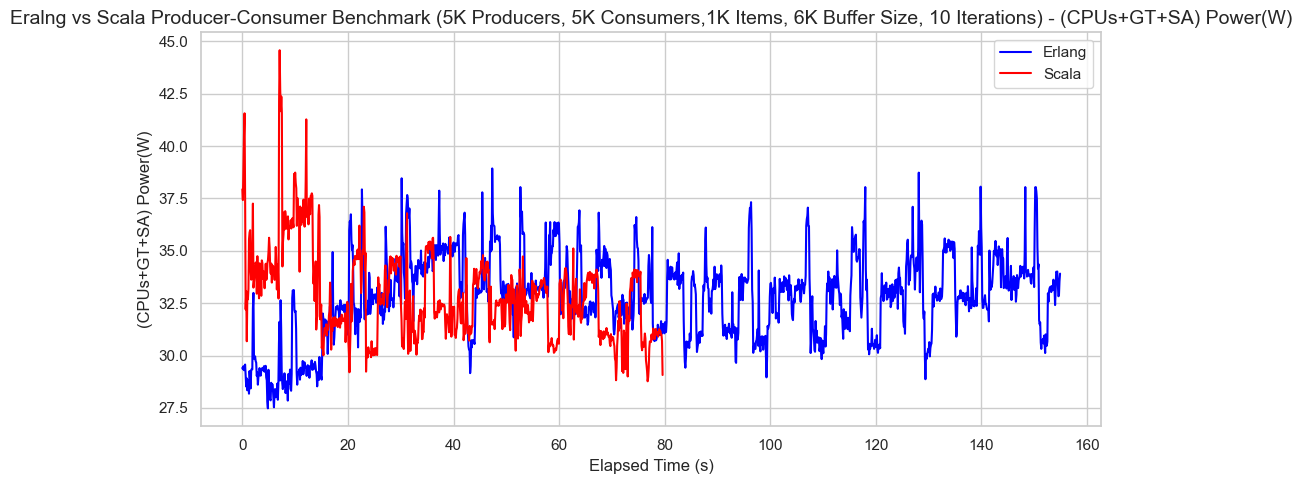

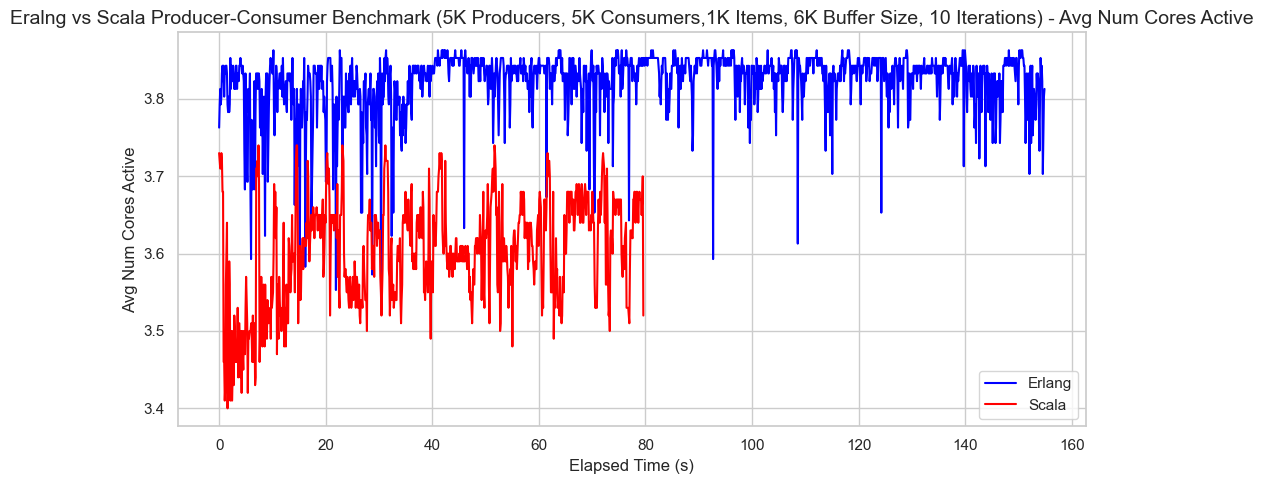

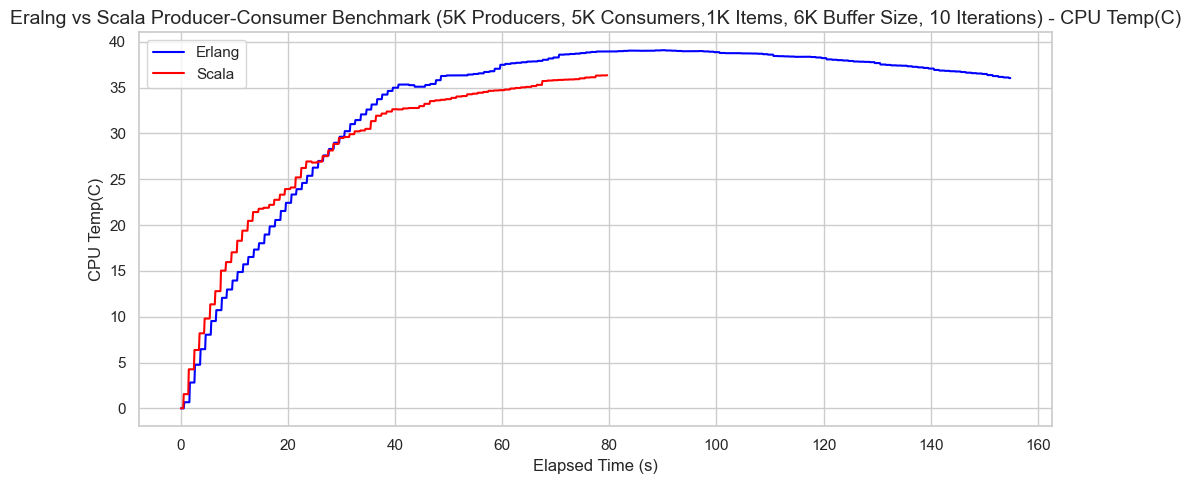

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Producer-Consumer Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.459000
GT Power(W)               0.001862
DRAM Power(W)             0.230037
(CPUs+GT+SA) Power(W)    32.880895
CPU Temp(C)              28.337684
Avg Num Cores Active      3.603887
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        30.202813
GT Power(W)               0.001129
DRAM Power(W)             0.250398
(CPUs+GT+SA) Power(W)    32.800889
CPU Temp(C)              33.403045
Avg Num Cores Active      3.822642
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "NP": NP,
    "NC": NC,
    "IPP": IPP,
    "BB": BB,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["NC"] == NC) & 
        (existing_data["NP"] == NP) &
        (existing_data["IPP"] == IPP) &
        (existing_data["BB"] == BB) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for NC =", NC, "NP =", NP, "IPP =", IPP, "BB =", BB, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/bnd_buffer/1/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 2446.120643872295 Joules
Erlang Benchmark: 4719.834087437924 Joules
